## pandas

#### Topics:

- handle missing values

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(pd.__version__)


2.2.0


## handle missing values, duplicates

In [40]:
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Helen', 'Helen', 'Jerry'],
#     'Age': [25, 30, 35, 40, 22, 28, 32, 26, 26, 26, 23],
#     'City': ['Chicago', 'Los Angeles', 'Chicago', 'Houston', 'Houston', np.nan, 'San Antonio', 'San Diego', 'San Diego', 'San Diego', 'Phoenix'],
#     'Experience': [2, 5, 7, 10, 1, 3, 6, 2, 2, 2, 6],
#     'Experience2': [2, 5, 7, 10, 1, 3, 6, 2, 2, 2, 6],
#     'Salary': [70000.0, 80000.0, np.nan, 90000.0, 48000.0, 72000.0, 85000.0, 62000.0, 62000.0, 62000.0, 78000.0]
# }

# df = pd.DataFrame(data)
# print(df)
# df.to_csv('missing_data.csv', index=False)

df = pd.read_csv('missing_data.csv')

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         11 non-null     object 
 1   Age          11 non-null     int64  
 2   City         10 non-null     object 
 3   Experience   11 non-null     int64  
 4   Experience2  11 non-null     int64  
 5   Salary       10 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 656.0+ bytes
None


#### observation
- Total entries are 11; total columns are 6
- Give data type for each column
- city has 10 non-null values, so it has 1 missing value
- Salary has 10 non-null values, so it has 1 missing value


In [42]:
# Handling Missing Values
df_missing_value = df.isnull()
print(df_missing_value)

missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values )
print(type(missing_values))

     Name    Age   City  Experience  Experience2  Salary
0   False  False  False       False        False   False
1   False  False  False       False        False   False
2   False  False  False       False        False    True
3   False  False  False       False        False   False
4   False  False  False       False        False   False
5   False  False   True       False        False   False
6   False  False  False       False        False   False
7   False  False  False       False        False   False
8   False  False  False       False        False   False
9   False  False  False       False        False   False
10  False  False  False       False        False   False

Missing Values:
 Name           0
Age            0
City           1
Experience     0
Experience2    0
Salary         1
dtype: int64
<class 'pandas.core.series.Series'>


#### observation
- city has 1 missing value
- Salary has 1 missing value


In [43]:
# Lets determine percentage of missing values per column:
missing_per_column = df.isnull().mean() * 100
print(missing_per_column)

Name           0.000000
Age            0.000000
City           9.090909
Experience     0.000000
Experience2    0.000000
Salary         9.090909
dtype: float64


In [44]:
# Lets determine percentage of missing values in the entire dataset:
total_cells = df.size
total_missing = df.isnull().sum().sum()
missing_percentage = (total_missing / total_cells) * 100
print(f"Total missing values: {total_missing}")
print(f"Percentage of missing data in dataset: {missing_percentage:.2f}%")


Total missing values: 2
Percentage of missing data in dataset: 3.03%


## 1) drop rows or columns
**Pros**
- Simple and easy to implement.
- No introduction of bias or distortion.
- Works well if only a small percentage of data is missing.

**Cons**
- Leads to loss of information, especially if many rows/columns are removed.
- May not be suitable for datasets with limited samples.

**When to Use?**
- Drop rows: When missing values are very few (e.g., <5% of the dataset)
- Drop col: When a feature/column has too many missing values (e.g., >60%), making it uninformative


In [45]:
df_clean = df.dropna(axis=0) #  Drop Rows with Any Missing Values

df_clean = df.dropna(axis=1) # Drop Columns with Any Missing Values

df_clean = df.dropna(how='all') # Drop Rows Only If All Values Are Missing

df_clean = df.dropna(subset=['Salary']) # Drop Rows Where Specific Column (Salary) Has Missing Value

print(df_clean)

     Name  Age         City  Experience  Experience2   Salary
0   Alice   25      Chicago           2            2  70000.0
1     Bob   30  Los Angeles           5            5  80000.0
3   David   40      Houston          10           10  90000.0
4     Eva   22      Houston           1            1  48000.0
5   Frank   28          NaN           3            3  72000.0
6   Grace   32  San Antonio           6            6  85000.0
7   Helen   26    San Diego           2            2  62000.0
8   Helen   26    San Diego           2            2  62000.0
9   Helen   26    San Diego           2            2  62000.0
10  Jerry   23      Phoenix           6            6  78000.0


## 2) manually add value if you know 

In [46]:
df_clean = df.copy()
df_clean['Salary'] = df['Salary'].fillna(0) # manually added 0
df_clean['City'] = df['City'].fillna('UNKNOWN')
print("\nDataFrame after filling missing values:\n", df_clean)


DataFrame after filling missing values:
        Name  Age         City  Experience  Experience2   Salary
0     Alice   25      Chicago           2            2  70000.0
1       Bob   30  Los Angeles           5            5  80000.0
2   Charlie   35      Chicago           7            7      0.0
3     David   40      Houston          10           10  90000.0
4       Eva   22      Houston           1            1  48000.0
5     Frank   28      UNKNOWN           3            3  72000.0
6     Grace   32  San Antonio           6            6  85000.0
7     Helen   26    San Diego           2            2  62000.0
8     Helen   26    San Diego           2            2  62000.0
9     Helen   26    San Diego           2            2  62000.0
10    Jerry   23      Phoenix           6            6  78000.0


## 3) Mean, Median, or Mode Imputation (Univariate Imputation)

Method: Replace missing values with the mean, median, or mode of the column.

Pros:
- Retains data size, avoiding information loss.
- Simple and quick to implement.

Cons:
- Mean/Median reduces variance and can distort distributions.
- Mode imputation can lead to over-representation of a single category in categorical data.
- Not effective if missing values are not random (i.e., they depend on some factor).

**When to Use?**
- Mean: Use for numerical data when data distribution is normal (Gaussian) and when values are missing at random
- Median: Better when the data has outliers (e.g., income, house prices).
- Mode: Use for categorical variables. If the categories were all evenly distributed, mode might not be ideal


#### 3.1) mean imputation

   Patient_ID  Blood_Pressure
0        P001      124.967142
1        P002      118.617357
2        P003      126.476885
3        P004      135.230299
4        P005      117.658466
5        P006             NaN
6        P007      135.792128
7        P008             NaN
8        P009      115.305256
9        P010      125.425600
10       P011      115.365823
11       P012             NaN
12       P013      122.419623
13       P014      100.867198
14       P015      102.750822
15       P016             NaN
16       P017      109.871689
17       P018             NaN
18       P019      110.919759
19       P020      105.876963
20       P021             NaN
21       P022      117.742237
22       P023      120.675282
23       P024      105.752518
24       P025      114.556173
25       P026      121.109226
26       P027      108.490064
27       P028             NaN
28       P029             NaN
29       P030      117.083063
30       P031      113.982934
31       P032      138.522782
32       P

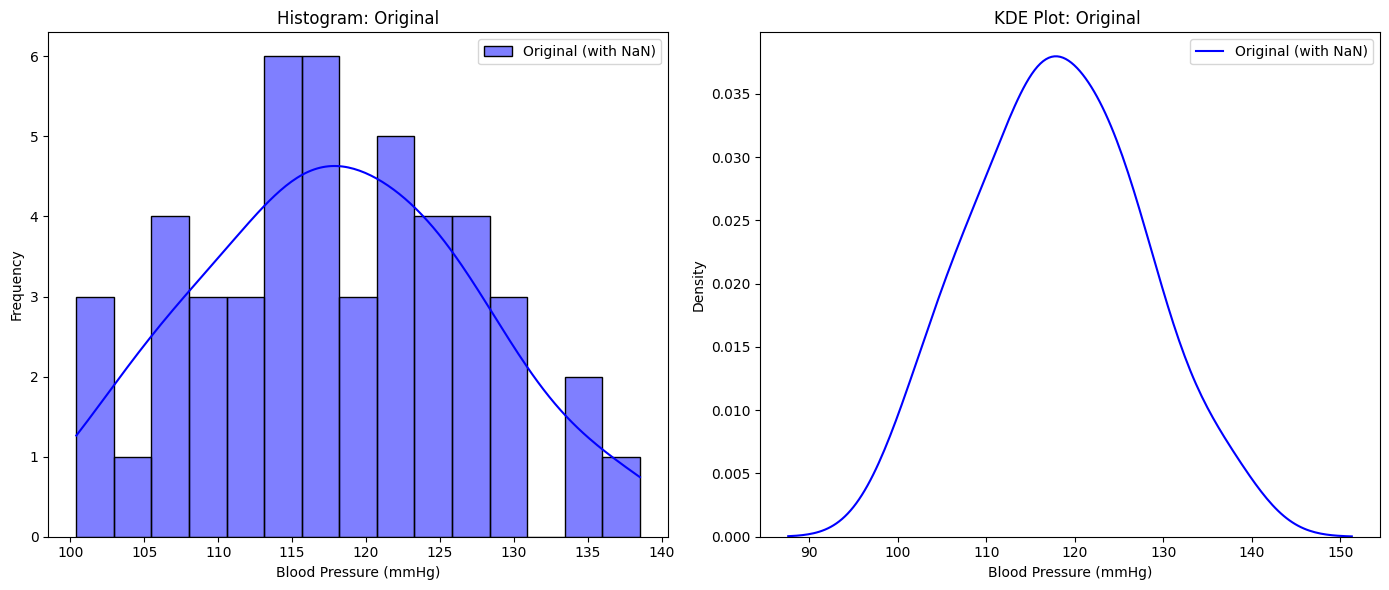

In [47]:
# Set random seed for reproducibility
np.random.seed(42)

# # Step 1: Create a DataFrame with 60 patients and normally distributed blood pressure readings
# data = {
#     'Patient_ID': [f'P{i+1:03d}' for i in range(60)],
#     'Blood_Pressure': np.random.normal(loc=120, scale=10, size=60)  # mean=120, std=10
# }

# df = pd.DataFrame(data)

# # Step 2: Randomly insert missing values (about 20% of them)
# missing_indices = np.random.choice(df.index, size=12, replace=False)
# df.loc[missing_indices, 'Blood_Pressure'] = np.nan
# df.to_csv('missing_patient_BP.csv', index=False)

df = pd.read_csv('missing_patient_BP.csv')
print(df)

# step 2.1: Lets plot the blood pressure and verify that it hass normal distribution
# Set up the plot
plt.figure(figsize=(14, 6))

# Histogram 
plt.subplot(1, 2, 1)
sns.histplot(df['Blood_Pressure'], kde=True, bins=15, color='blue', label='Original (with NaN)')
plt.title("Histogram: Original")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.legend()

# KDE Plot 
plt.subplot(1, 2, 2)
sns.kdeplot(df['Blood_Pressure'], color='blue', label='Original (with NaN)')
plt.title("KDE Plot: Original ")
plt.xlabel("Blood Pressure (mmHg)")
plt.legend()

plt.tight_layout()
plt.show()

### obseravtion:
- the Blood Pressure has normal distribution curve. So we can fill the mising value with mean value.


Mean Blood Pressure before imputation (ignoring NaN): 118.0

Data after Mean Imputation:
   Patient_ID  Blood_Pressure  Blood_Pressure_Imputed
0       P001      124.967142              124.967142
1       P002      118.617357              118.617357
2       P003      126.476885              126.476885
3       P004      135.230299              135.230299
4       P005      117.658466              117.658466
5       P006             NaN              117.998387
6       P007      135.792128              135.792128
7       P008             NaN              117.998387
8       P009      115.305256              115.305256
9       P010      125.425600              125.425600


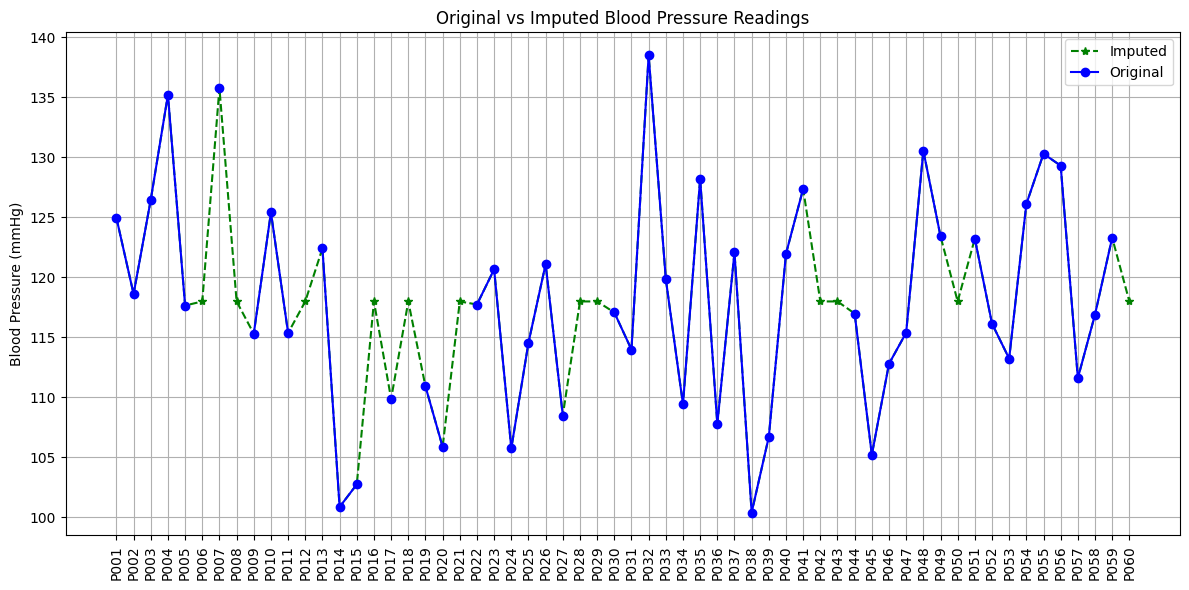

In [48]:

mean_bp = df['Blood_Pressure'].mean()
df['Blood_Pressure_Imputed'] = df['Blood_Pressure'].fillna(mean_bp)

# Step 5: Compare before and after
print("\nMean Blood Pressure before imputation (ignoring NaN):", round(mean_bp, 2))
print("\nData after Mean Imputation:\n", df.head(10))

# Step 6: Visualize the difference
plt.figure(figsize=(12, 6))
plt.plot(df['Patient_ID'], df['Blood_Pressure_Imputed'], label='Imputed',  marker='*', linestyle='--', color='green')
plt.plot(df['Patient_ID'], df['Blood_Pressure'],         label='Original', marker='o', linestyle='-', color='blue')
plt.xticks(rotation=90)
plt.ylabel("Blood Pressure (mmHg)")
plt.title("Original vs Imputed Blood Pressure Readings")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

#### observation:
- the missing values for patient p006, p008,p012, etc are all imputed with same number, mean = 118

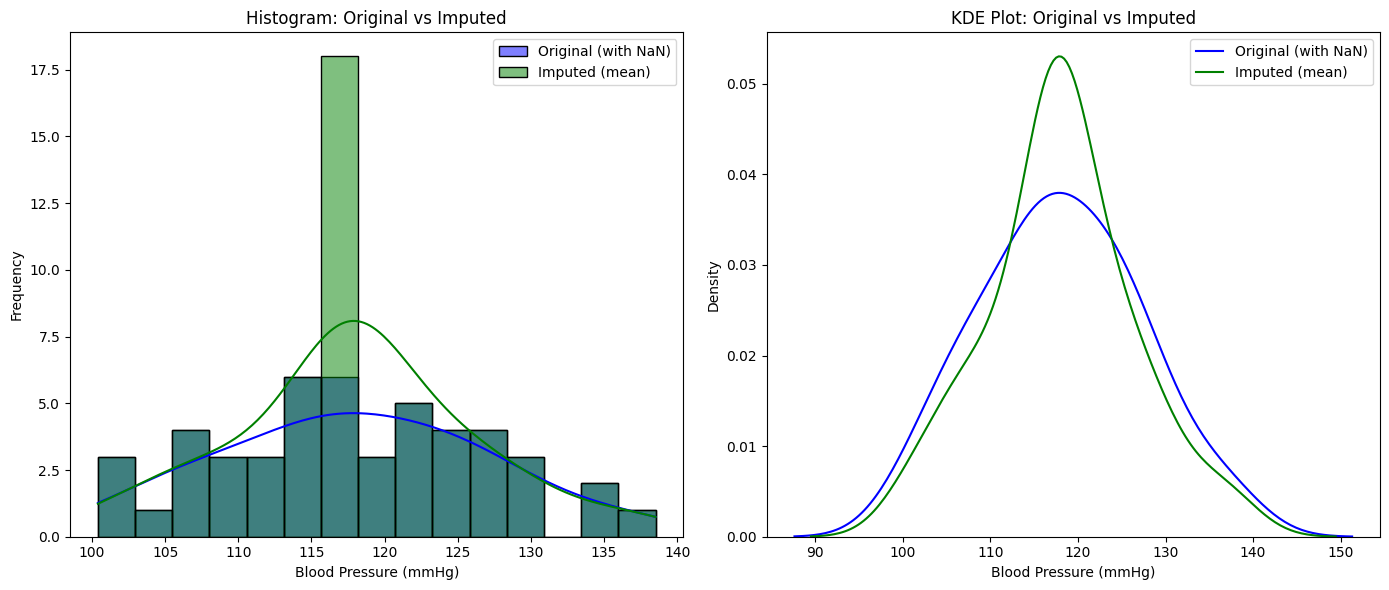


📊 Descriptive Statistics:
Original (ignoring NaN):
count     48.000000
mean     117.998387
std        9.246372
min      100.403299
25%      111.435808
50%      117.370764
75%      123.818923
max      138.522782
Name: Blood_Pressure, dtype: float64

After Imputation (mean):
count     60.000000
mean     117.998387
std        8.252666
min      100.403299
25%      113.794895
50%      117.998387
75%      122.624927
max      138.522782
Name: Blood_Pressure_Imputed, dtype: float64


In [49]:

# Create copies to compare
original = df['Blood_Pressure']
imputed = df['Blood_Pressure_Imputed']

# Set up the plot
plt.figure(figsize=(14, 6))

# Histogram comparison
plt.subplot(1, 2, 1)
sns.histplot(original, kde=True, bins=15, color='blue', label='Original (with NaN)')
sns.histplot(imputed, kde=True, bins=15, color='green', label='Imputed (mean)', alpha=0.5)
plt.title("Histogram: Original vs Imputed")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.legend()

# KDE Plot comparison
plt.subplot(1, 2, 2)
sns.kdeplot(original, color='blue', label='Original (with NaN)')
sns.kdeplot(imputed, color='green', label='Imputed (mean)')
plt.title("KDE Plot: Original vs Imputed")
plt.xlabel("Blood Pressure (mmHg)")
plt.legend()

plt.tight_layout()
plt.show()

# Descriptive statistics
print("\n📊 Descriptive Statistics:")
print("Original (ignoring NaN):")
print(original.describe())
print("\nAfter Imputation (mean):")
print(imputed.describe())


#### observation
what are you looking for ?

- The KDE plots should look very similar since mean imputation doesn’t distort the shape much: **Thats true here**
- The histogram will show some stacked bars at the imputed mean value: **Thats true here as you can see tall bar at 118**
- The mean will be the same, but the std might slightly reduce due to flattening of the variance: **The mean is same in both, and std_dev went down from 9.2 to 8.2**

#### 3.2) median imputation

First 20 records: 
    Monthly_Doctor_Visits
0                     1.0
1                     9.0
2                     4.0
3                     3.0
4                     1.0
5                     1.0
6                     NaN
7                     6.0
8                     NaN
9                     4.0
10                    0.0
11                   11.0
12                    NaN
13                    1.0
14                    1.0
15                    1.0
16                    1.0
17                    NaN
18                    2.0
19                    NaN


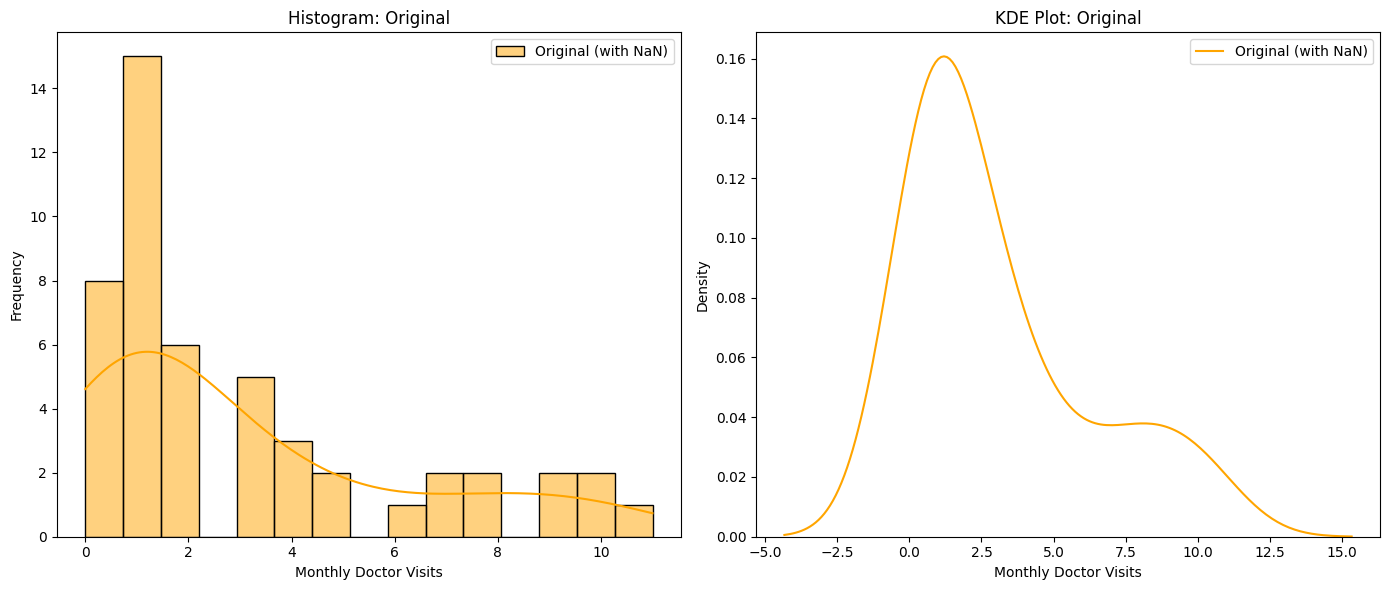

In [50]:
np.random.seed(42) # Set seed for reproducibility

# # Step 1: Generate skewed data (using exponential distribution)
# visits = np.random.exponential(scale=3, size=60).round()

# # Step 2: Introduce missing values in about 15% of records
# mask = np.random.choice([True, False], size=60, p=[0.15, 0.85])
# visits[mask] = np.nan

# # Step 3: Create DataFrame
# # This is the number of monthly doctor visits by patients in a clinic. Some patients didn’t 
# # report their number of visits. The data is skewed because a few patients visit
# # the doctor very frequently (outliers).
# df = pd.DataFrame({'Monthly_Doctor_Visits': visits})
# df.to_csv('missing_monthly_dr_visits.csv', index=False)

df = pd.read_csv('missing_monthly_dr_visits.csv')
print(f"First 20 records: \n{df.head(20)}")

# lets plot and see what kind of distributin is column
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Monthly_Doctor_Visits'], kde=True, bins=15, color='orange', label='Original (with NaN)')
plt.title("Histogram: Original")
plt.xlabel("Monthly Doctor Visits")
plt.ylabel("Frequency")
plt.legend()

# KDE
plt.subplot(1, 2, 2)
sns.kdeplot(df['Monthly_Doctor_Visits'], label='Original (with NaN)', color='orange')
plt.title("KDE Plot: Original")
plt.xlabel("Monthly Doctor Visits")
plt.legend()

plt.tight_layout()
plt.show()

## observation
- distribution is not normal. It is skewed to the right

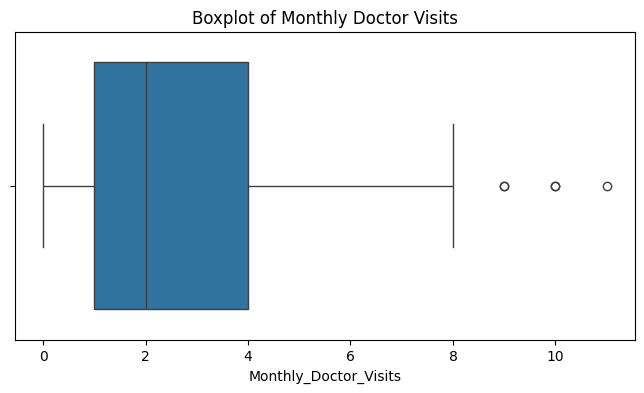

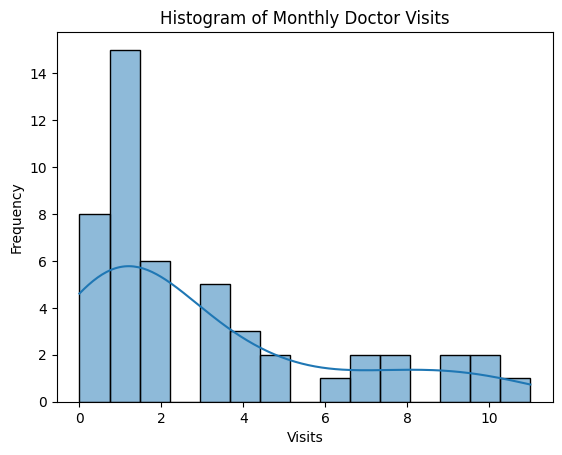

Outliers based on IQR:
     Monthly_Doctor_Visits
1                     9.0
11                   11.0
33                    9.0
34                   10.0
50                   10.0


In [51]:
### Lets check if there are any outliers ?

# method1
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Monthly_Doctor_Visits'])
plt.title("Boxplot of Monthly Doctor Visits")
plt.show()

# method2: Histogram with KDE (To See Skew + Spread)
sns.histplot(df['Monthly_Doctor_Visits'], bins=15, kde=True)
plt.title("Histogram of Monthly Doctor Visits")
plt.xlabel("Visits")
plt.ylabel("Frequency")
plt.show()

# method3: IQR Method (Interquartile Range)
Q1 = df['Monthly_Doctor_Visits'].quantile(0.25)
Q3 = df['Monthly_Doctor_Visits'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Monthly_Doctor_Visits'] < lower_bound) | (df['Monthly_Doctor_Visits'] > upper_bound)]
print("Outliers based on IQR:\n", outliers)


### observation
- From box-plot and IQR method we see there are total of 5 outliers with 3 outliers values: 9, 10 and 11.
- we see the presence of outliers and the dist curve is kskewed to the right. So we impute with median

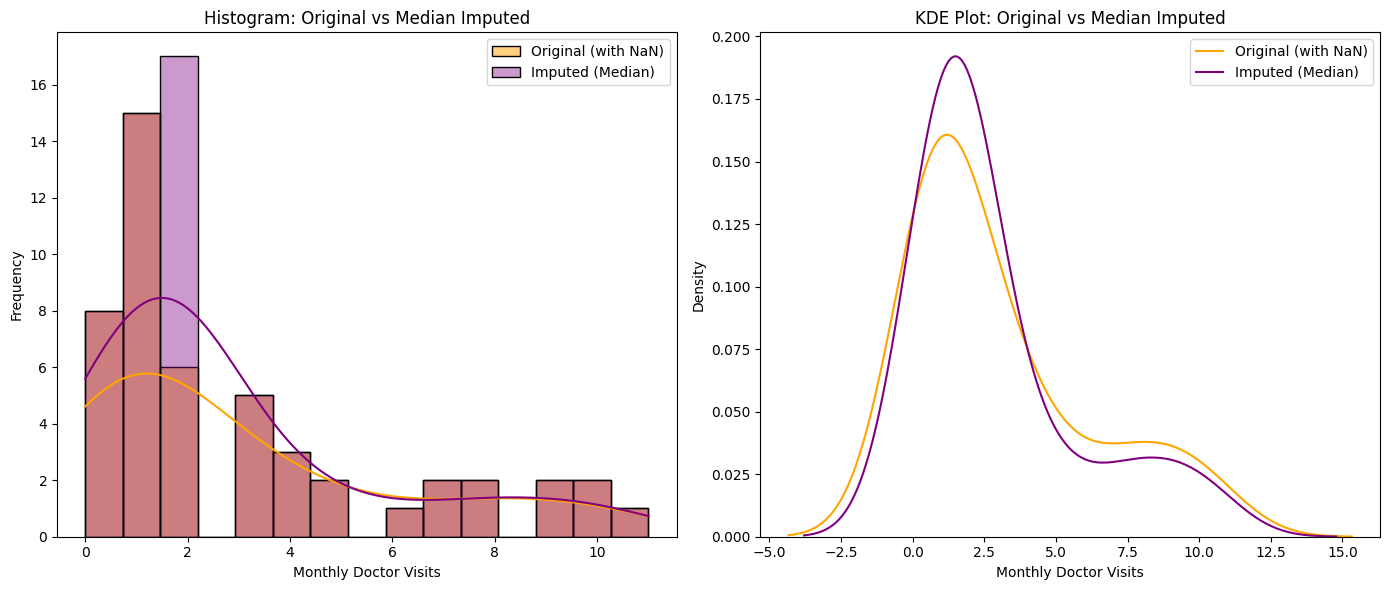


📊 Descriptive Statistics:
Original (excluding NaNs):
count    49.000000
mean      3.040816
std       3.142181
min       0.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      11.000000
Name: Monthly_Doctor_Visits, dtype: float64

After Median Imputation:
count    60.00000
mean      2.85000
std       2.86312
min       0.00000
25%       1.00000
50%       2.00000
75%       3.25000
max      11.00000
Name: Visits_Imputed, dtype: float64


In [52]:
# Step 4: Impute with median
median_value = df['Monthly_Doctor_Visits'].median()
df['Visits_Imputed'] = df['Monthly_Doctor_Visits'].fillna(median_value)

# Step 5: Plot comparison
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Monthly_Doctor_Visits'], kde=True, bins=15, color='orange', label='Original (with NaN)')
sns.histplot(df['Visits_Imputed'], kde=True, bins=15, color='purple', label='Imputed (Median)', alpha=0.4)
plt.title("Histogram: Original vs Median Imputed")
plt.xlabel("Monthly Doctor Visits")
plt.ylabel("Frequency")
plt.legend()

# KDE
plt.subplot(1, 2, 2)
sns.kdeplot(df['Monthly_Doctor_Visits'], label='Original (with NaN)', color='orange')
sns.kdeplot(df['Visits_Imputed'], label='Imputed (Median)', color='purple')
plt.title("KDE Plot: Original vs Median Imputed")
plt.xlabel("Monthly Doctor Visits")
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Descriptive statistics
print("\n📊 Descriptive Statistics:")
print("Original (excluding NaNs):")
print(df['Monthly_Doctor_Visits'].describe())
print("\nAfter Median Imputation:")
print(df['Visits_Imputed'].describe())

#### observation
- After imputation, the shape stays true to original, with less distortion (than if you used mean.)

### 3.3) mode

Before imputation: 
   Preferred_Learning_Method
0                     Visual
1            Reading/Writing
2                Kinesthetic
3                   Auditory
4                     Visual
5                     Visual
6                        NaN
7                Kinesthetic
8                        NaN
9                Kinesthetic
10                    Visual
11                       NaN
12                       NaN
13                    Visual
14                    Visual
15                    Visual
16                    Visual
17                       NaN
18                  Auditory
19                       NaN
20                  Auditory
21                    Visual
22                    Visual
23                       NaN
24                  Auditory
25               Kinesthetic
26                    Visual
27                  Auditory
28                  Auditory
29                    Visual
30                       NaN
31                    Visual
32                    V

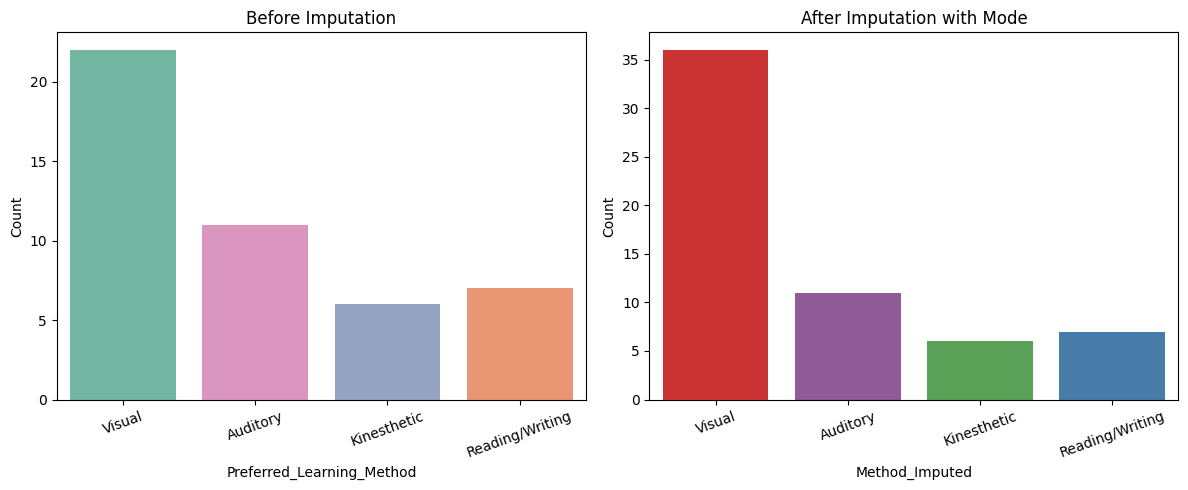


Frequency Counts:
Before (excluding NaNs):
Preferred_Learning_Method
Visual             22
Auditory           11
Reading/Writing     7
Kinesthetic         6
Name: count, dtype: int64

After Mode Imputation:
Method_Imputed
Visual             36
Auditory           11
Reading/Writing     7
Kinesthetic         6
Name: count, dtype: int64


In [53]:
# Set seed for reproducibility
np.random.seed(42)

# # Step 1: Create list of learning methods
# methods = ['Visual', 'Auditory', 'Kinesthetic', 'Reading/Writing']
# probs = [0.4, 0.3, 0.2, 0.1]  # Visual is most common

# # Generate 60 random learning preferences
# learning_prefs = np.random.choice(methods, size=60, p=probs)

# # Step 2: Introduce missing values (~20%)
# mask = np.random.choice([True, False], size=60, p=[0.2, 0.8])
# learning_prefs[mask] = np.nan

# # Step 3: Create DataFrame
# df = pd.DataFrame({'Preferred_Learning_Method': learning_prefs})
# df['Preferred_Learning_Method'] = df['Preferred_Learning_Method'].replace('nan', np.nan) # for some reason, 'nan' was string
# df.to_csv('missing_learning_method.csv', index=False)

df = pd.read_csv('missing_learning_method.csv')
print(f"Before imputation: \n{df}")

# Step 4: Impute with mode
mode_value = df['Preferred_Learning_Method'].mode()[0]
print(f"mode: {mode_value}")
df['Method_Imputed'] = df['Preferred_Learning_Method'].fillna(mode_value)
print(f"How many still null: {df['Method_Imputed'].isna().sum()}")  # Should be 0
print(f"After imputation: \n{df}")

# Step 5: Plot value counts
plt.figure(figsize=(12, 5))

# Before imputation
plt.subplot(1, 2, 1)
# sns.countplot(x='Preferred_Learning_Method', data=df, order=methods, palette='Set2')
sns.countplot(x='Preferred_Learning_Method', data=df, order=methods, hue='Preferred_Learning_Method', palette='Set2', legend=False)

plt.title("Before Imputation")
plt.ylabel("Count")
plt.xticks(rotation=20)

# After imputation
plt.subplot(1, 2, 2)
# sns.countplot(x='Method_Imputed', data=df, order=methods, palette='Set1')
sns.countplot(x='Method_Imputed', data=df, order=methods, hue='Method_Imputed', palette='Set1', legend=False)

plt.title("After Imputation with Mode")
plt.ylabel("Count")
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

# Step 6: Frequency before and after
print("\nFrequency Counts:")
print("Before (excluding NaNs):")
print(df['Preferred_Learning_Method'].value_counts(dropna=True))
print("\nAfter Mode Imputation:")
print(df['Method_Imputed'].value_counts())


### observaion
Left Plot – Before Imputation:
- This shows the distribution of non-missing learning preferences.
- You can spot that one category—probably 'Visual'—has a clear lead in frequency. This tells you that 'Visual' is the mode.

Right Plot – After Imputation:
- This includes both original and filled values.
- The bar for the mode category (e.g., 'Visual') increases compared to the original. Other categories should remain unchanged.
- The overall distribution shape is preserved, just slightly skewed toward the mode.

**Why That Confirms Mode Was a Good Choice:**
- The mode already dominated the data, so reinforcing that pattern doesn't introduce bias.
- You are not distorting the categorical distribution.
- If you had chosen something else (like random fill), the distribution would become noisier and less realistic.
- **If the categories were all evenly distributed, mode might not be ideal—but here it's clearly skewed to one.**

## 4) use ffill or bfill

- Forward Fill (ffill) → Fill missing values with the last known value.
- Backward Fill (bfill) → Fill missing values with the next known value.

Pros:
- Maintains continuity in time-series or sequential data.
- Preserves trend and seasonality.

Cons:
- Can propagate incorrect values if missing data is not random.
- Does not work well when multiple consecutive values are missing.

**When to Use?**
- Time-series data (stock prices, weather reports, sensor data).
- Ordered categorical data (survey responses with an order).


In [54]:
# Simulated stock price data
# data = {
#     'Date': pd.date_range(start='2024-01-01', periods=16, freq='D'),
#     'StockPrice': [100, np.nan, 102, np.nan, np.nan, 105, 106, np.nan, 108, 
#                    np.nan, np.nan, 111, 113, np.nan, 115, np.nan]
# }


# df = pd.DataFrame(data)
# df.to_csv('missing_stock_price.csv', index=False)

df = pd.read_csv('missing_stock_price.csv')
print("Original DataFrame with missing values:")
print(df)

Original DataFrame with missing values:
          Date  StockPrice
0   2024-01-01       100.0
1   2024-01-02         NaN
2   2024-01-03       102.0
3   2024-01-04         NaN
4   2024-01-05         NaN
5   2024-01-06       105.0
6   2024-01-07       106.0
7   2024-01-08         NaN
8   2024-01-09       108.0
9   2024-01-10         NaN
10  2024-01-11         NaN
11  2024-01-12       111.0
12  2024-01-13       113.0
13  2024-01-14         NaN
14  2024-01-15       115.0
15  2024-01-16         NaN


In [55]:
df_ffill = df.copy()
df_ffill['StockPrice'] = df_ffill['StockPrice'].ffill() # This fills missing values with the last known valid price.
print("\nForward Fill (ffill) applied:")
print(df_ffill)


Forward Fill (ffill) applied:
          Date  StockPrice
0   2024-01-01       100.0
1   2024-01-02       100.0
2   2024-01-03       102.0
3   2024-01-04       102.0
4   2024-01-05       102.0
5   2024-01-06       105.0
6   2024-01-07       106.0
7   2024-01-08       106.0
8   2024-01-09       108.0
9   2024-01-10       108.0
10  2024-01-11       108.0
11  2024-01-12       111.0
12  2024-01-13       113.0
13  2024-01-14       113.0
14  2024-01-15       115.0
15  2024-01-16       115.0


In [56]:
df_bfill = df.copy()
df_bfill['StockPrice'] = df_bfill['StockPrice'].bfill()
print("\nBackward Fill (bfill) applied:") # This fills missing values with the next known valid price.
print(df_bfill)



Backward Fill (bfill) applied:
          Date  StockPrice
0   2024-01-01       100.0
1   2024-01-02       102.0
2   2024-01-03       102.0
3   2024-01-04       105.0
4   2024-01-05       105.0
5   2024-01-06       105.0
6   2024-01-07       106.0
7   2024-01-08       108.0
8   2024-01-09       108.0
9   2024-01-10       111.0
10  2024-01-11       111.0
11  2024-01-12       111.0
12  2024-01-13       113.0
13  2024-01-14       115.0
14  2024-01-15       115.0
15  2024-01-16         NaN


In [57]:
# You can even combine both:
df_combined = df.copy()
df_combined['StockPrice'] = df_combined['StockPrice'].ffill().bfill()
print("\nForward Fill then Backward Fill applied:")
print(df_combined)


Forward Fill then Backward Fill applied:
          Date  StockPrice
0   2024-01-01       100.0
1   2024-01-02       100.0
2   2024-01-03       102.0
3   2024-01-04       102.0
4   2024-01-05       102.0
5   2024-01-06       105.0
6   2024-01-07       106.0
7   2024-01-08       106.0
8   2024-01-09       108.0
9   2024-01-10       108.0
10  2024-01-11       108.0
11  2024-01-12       111.0
12  2024-01-13       113.0
13  2024-01-14       113.0
14  2024-01-15       115.0
15  2024-01-16       115.0


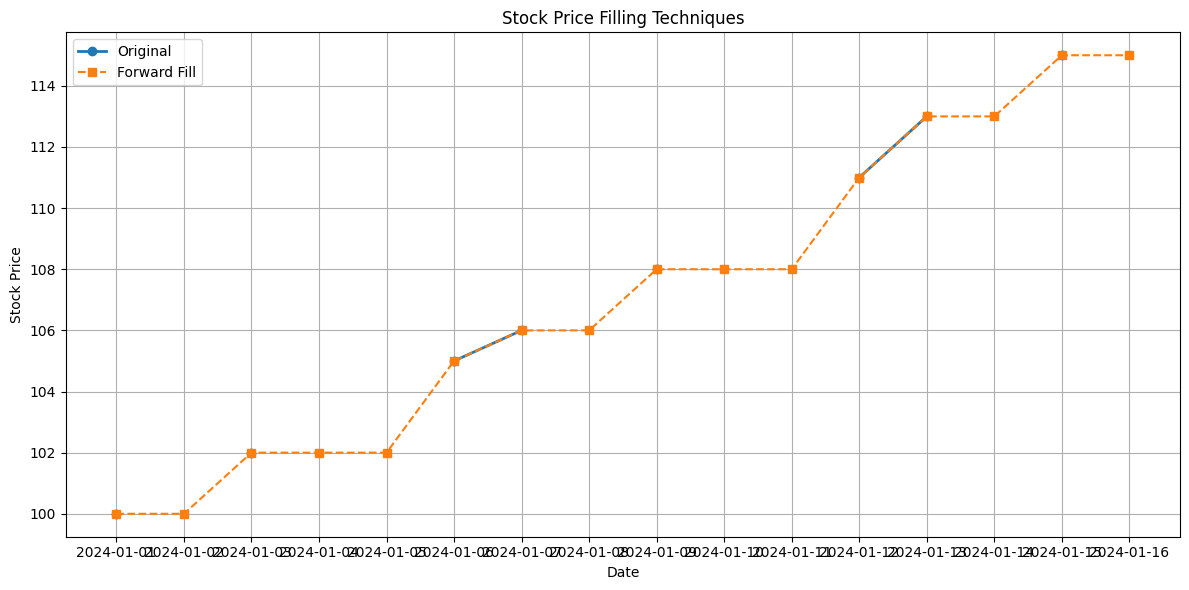

In [58]:
# Plotting all versions. 
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['StockPrice'], 'o-', label='Original', linewidth=2)

# NOTE: comment each one out to see them
plt.plot(df_ffill['Date'], df_ffill['StockPrice'], 's--', label='Forward Fill')
# plt.plot(df_bfill['Date'], df_bfill['StockPrice'], 'd--', label='Backward Fill')
# plt.plot(df_combined['Date'], df_combined['StockPrice'], '*-', label='Combined Fill')

plt.title('Stock Price Filling Techniques')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5) Linear Interpolation for Handling Missing Values
Linear interpolation estimates missing values by assuming a straight-line relationship between known values before and after the missing value.

Pros:
- Works well for continuous numerical data where values follow a trend.
- Preserves relationships between data points instead of replacing with a constant (like mean/median).
- Computationally efficient compared to KNN or ML-based methods.
- Useful for time-series data or sensor readings.

Cons:
- Does not work for categorical data (e.g., missing city names).
- Can distort data if missing values are not linearly related.
- Fails if the missing values appear at the start or end of the dataset (extrapolation is needed instead).

**When to Use?**
- Best for Time-series data (stock prices, temperature, weather trends).
- Best for Continuous numerical data that follows a natural progression.

**Avoid when:**
- Missing values are random with no clear pattern.
- Data has sudden jumps, non-linear trends, or categories.


In [59]:
# Generate 30 days of temperature readings
np.random.seed(42)

# days = pd.date_range(start='2024-01-01', periods=30, freq='D')
# temps = np.random.normal(loc=98.6, scale=0.7, size=30).round(1)

# # Introduce missing values at random positions
# mask = np.random.choice([True, False], size=30, p=[0.2, 0.8])
# temps[mask] = np.nan

# # Create DataFrame
# df = pd.DataFrame({'Date': days, 'Body_Temperature': temps})
# df.to_csv('missing_body_temperature_linear.csv', index=False)

df = pd.read_csv('missing_body_temperature_linear.csv')
print(df.head(10))


         Date  Body_Temperature
0  2024-01-01              98.9
1  2024-01-02              98.5
2  2024-01-03               NaN
3  2024-01-04              99.7
4  2024-01-05               NaN
5  2024-01-06              98.4
6  2024-01-07              99.7
7  2024-01-08              99.1
8  2024-01-09              98.3
9  2024-01-10              99.0


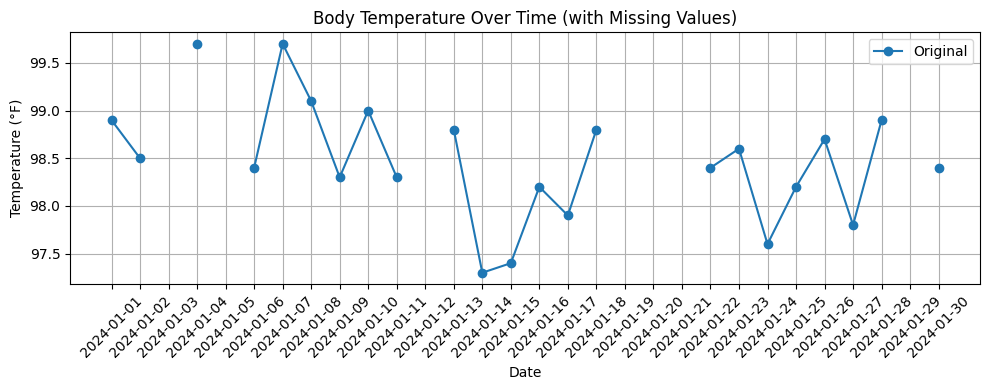

In [60]:
# Step 2: Plot before interpolation
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Body_Temperature'], marker='o', label='Original')
plt.title('Body Temperature Over Time (with Missing Values)')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


         Date  Body_Temperature  Temp_Interpolated
0  2024-01-01              98.9              98.90
1  2024-01-02              98.5              98.50
2  2024-01-03               NaN              99.10
3  2024-01-04              99.7              99.70
4  2024-01-05               NaN              99.05
5  2024-01-06              98.4              98.40
6  2024-01-07              99.7              99.70
7  2024-01-08              99.1              99.10
8  2024-01-09              98.3              98.30
9  2024-01-10              99.0              99.00


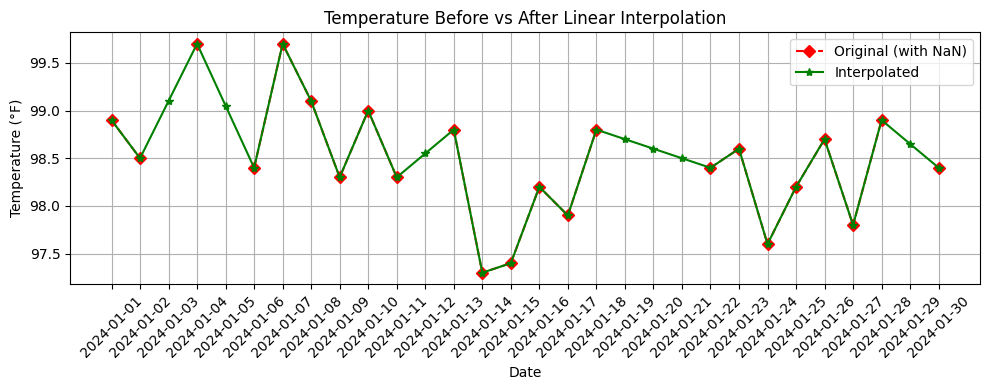

In [61]:
# Step 3: Interpolate the missing values
df['Temp_Interpolated'] = df['Body_Temperature'].interpolate(method='linear')
print(df.head(10))

# Step 4: Plot after interpolation
plt.figure(figsize=(10, 4))

# Original (with NaN)
plt.plot(df['Date'], df['Body_Temperature'], linestyle='--', marker='D', label='Original (with NaN)', color='red')

# Interpolated
plt.plot(df['Date'], df['Temp_Interpolated'], linestyle='-', marker='*', label='Interpolated', color='green')

plt.title('Temperature Before vs After Linear Interpolation')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### observation
Interpolation works well here because temperature is continuous and changes smoothly over time.

##  5)(OPTIONAL) polynomial and spline interpolation
We'll simulate missing temperature data first and then:
- Apply Polynomial Interpolation (e.g., degree 2 or 3)
- Apply Spline Interpolation (e.g., cubic spline)
- Visualize original + interpolated curves

In [62]:
# step1 : Dataset Setup (Simulated Daily Temperature with Missing Values):

# from scipy.interpolate import interp1d

# # Generate date range
# np.random.seed(42)
# dates = pd.date_range(start='2024-01-01', periods=30)

# # Generate temperature with a slight upward curve + noise
# temps = 98.0 + 0.05 * np.arange(30) + np.random.normal(0, 0.2, size=30)

# # Randomly introduce missing values
# mask = np.random.choice([True, False], size=30, p=[0.25, 0.75])
# temps[mask] = np.nan

# # Create DataFrame
# df = pd.DataFrame({'Date': dates, 'Body_Temperature': temps})
# df.to_csv('missing_body_temperature_poly_spline.csv', index=False)

df = pd.read_csv('missing_body_temperature_poly_spline.csv')
print(df.head(10))

         Date  Body_Temperature
0  2024-01-01         98.099343
1  2024-01-02         98.022347
2  2024-01-03               NaN
3  2024-01-04         98.454606
4  2024-01-05               NaN
5  2024-01-06         98.203173
6  2024-01-07         98.615843
7  2024-01-08         98.503487
8  2024-01-09         98.306105
9  2024-01-10         98.558512


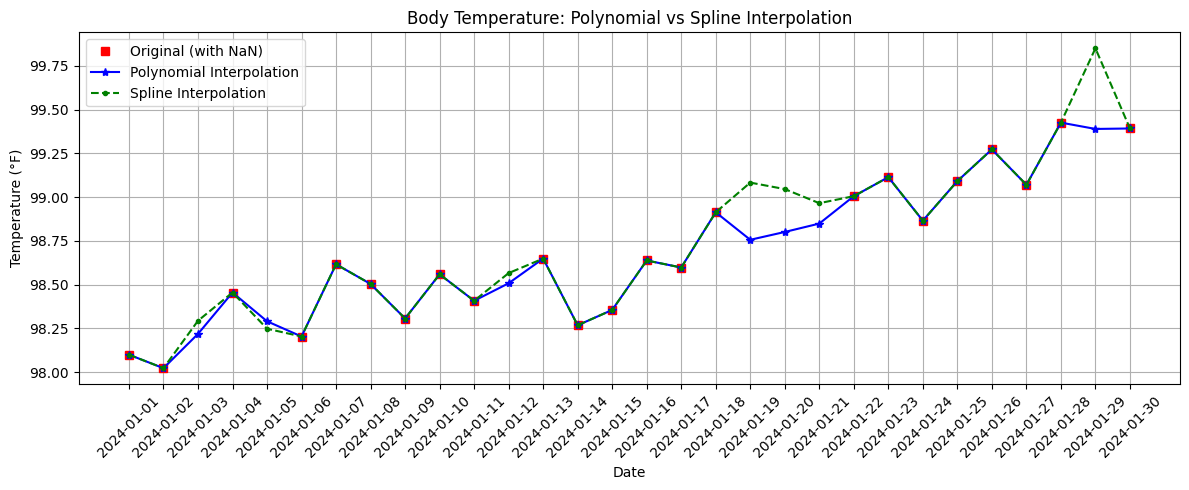

In [63]:
# step2a : Polynomial Interpolation (Degree 3)
# Drop NaNs for interpolation
df_dropna = df.dropna()
x = df_dropna.index
y = df_dropna['Body_Temperature']

# Fit polynomial
poly = np.poly1d(np.polyfit(x, y, deg=3))

# Fill missing values
df['Temp_Polynomial'] = df['Body_Temperature']
df.loc[df['Body_Temperature'].isna(), 'Temp_Polynomial'] = poly(df.loc[df['Body_Temperature'].isna()].index)


#step2b : Spline Interpolation (Cubic)
from scipy.interpolate import CubicSpline

# Use the same x and y
cs = CubicSpline(x, y)

# Fill missing values using spline
df['Temp_Spline'] = df['Body_Temperature']
df.loc[df['Body_Temperature'].isna(), 'Temp_Spline'] = cs(df.loc[df['Body_Temperature'].isna()].index)


#step3 : Plot the Original + Interpolated Values
plt.figure(figsize=(12, 5))

plt.plot(df['Date'], df['Body_Temperature'], linestyle='None', marker='s', label='Original (with NaN)', color='red')
plt.plot(df['Date'], df['Temp_Polynomial'],  linestyle='-',    marker='*', label='Polynomial Interpolation', color='blue')
plt.plot(df['Date'], df['Temp_Spline'],      linestyle='--',   marker='.', label='Spline Interpolation', color='green')

plt.title("Body Temperature: Polynomial vs Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### observetaion
The polynomial and spline interpolation did a good job. 

### 5) K-Nearest Neighbors (KNN) Imputation
Replace missing values based on the values of the k-nearest data points.

Pros:
- Uses patterns from real data, making it more accurate than mean/median imputation.
- Works well when missing values are not random.

Cons:
- Computationally expensive for large datasets.
- May distort relationships if neighbors are not similar.

**When to Use?**
- Data has relationships or correlations across columns (e.g., age may relate to weight or cholesterol).
- When missing data is not missing at random (MNAR).
- When dataset is small to medium-sized with well-defined clusters.

In [64]:
# For reproducibility
np.random.seed(42)

# # Step 1: Generate synthetic patient data
# n = 60
# ages = np.random.normal(loc=50, scale=15, size=n).round(1)  # mean age 50
# weights = np.random.normal(loc=70, scale=10, size=n).round(1)  # weight in kg
# heights = np.random.normal(loc=170, scale=10, size=n).round(1)  # height in cm
# cholesterol = np.random.normal(loc=190, scale=25, size=n).round(1)  # mg/dL

# # Step 2: Introduce ~15% missing values randomly
# def introduce_missing(data, missing_rate=0.15):
#     mask = np.random.choice([True, False], size=len(data), p=[missing_rate, 1 - missing_rate])
#     data[mask] = np.nan
#     return data

# ages = introduce_missing(ages)
# weights = introduce_missing(weights)
# heights = introduce_missing(heights)
# cholesterol = introduce_missing(cholesterol)

# # Step 3: Create DataFrame
# df = pd.DataFrame({
#     'Age': ages,
#     'Weight_kg': weights,
#     'Height_cm': heights,
#     'Cholesterol_Level': cholesterol
# })
# df.to_csv('missing_patient_info_KNN.csv', index=False)


df = pd.read_csv('missing_patient_info_KNN.csv')
print("First 10 rows of dataset with missing values:")
print(df.head(10))
print("################")
print(df.info())

First 10 rows of dataset with missing values:
    Age  Weight_kg  Height_cm  Cholesterol_Level
0  57.5        NaN        NaN              205.6
1   NaN        NaN      160.9              168.6
2   NaN        NaN      184.0              163.2
3  72.8       58.0        NaN              202.1
4  46.5        NaN        NaN              184.4
5  46.5       83.6      191.9              207.9
6  73.7       69.3        NaN              201.8
7  61.5        NaN      164.3                NaN
8  43.0       73.6      171.0              168.8
9  58.1       63.5        NaN              152.1
################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                49 non-null     float64
 1   Weight_kg          48 non-null     float64
 2   Height_cm          44 non-null     float64
 3   Cholesterol_Level  54 non-null     float64
dtypes: 


 Dataset after KNN Imputation (first 10 rows):
         Age  Weight_kg   Height_cm  Cholesterol_Level
0  57.500000  70.966667  166.466667         205.600000
1  37.766667  63.666667  160.900000         168.600000
2  49.266667  62.266667  184.000000         163.200000
3  72.800000  58.000000  182.433333         202.100000
4  46.500000  71.866667  174.500000         184.400000
5  46.500000  83.600000  191.900000         207.900000
6  73.700000  69.300000  176.133333         201.800000
7  61.500000  63.966667  164.300000         189.533333
8  43.000000  73.600000  171.000000         168.800000
9  58.100000  63.500000  173.333333         152.100000


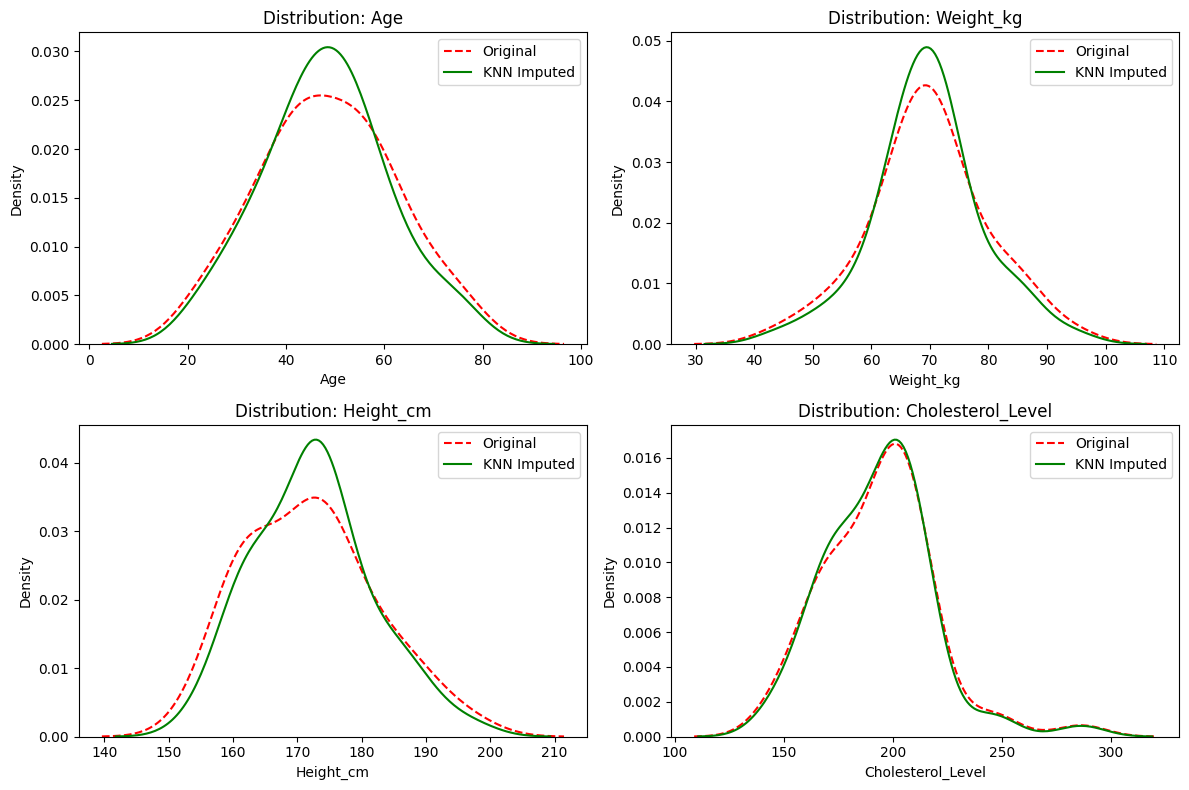

In [65]:
from sklearn.impute import KNNImputer

# Make a copy for imputation
df_knn = df.copy()

# Step 1: Initialize KNNImputer (using 3 neighbors)
imputer = KNNImputer(n_neighbors=3)

# Step 2: Fit and transform
df_knn_imputed = imputer.fit_transform(df_knn)

# Step 3: Convert back to DataFrame
df_knn_imputed = pd.DataFrame(df_knn_imputed, columns=df.columns)

# Show before and after
print("\n Dataset after KNN Imputation (first 10 rows):")
print(df_knn_imputed.head(10))

# Plot distribution before and after imputation
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = ['Age', 'Weight_kg', 'Height_cm', 'Cholesterol_Level']

for i, feature in enumerate(features):
    row, col = i // 2, i % 2 # row and col go from 0 to 1
    ax = axes[row, col]
    sns.kdeplot(df[feature], label='Original', ax=ax, color='red', linestyle="--")
    sns.kdeplot(df_knn_imputed[feature], label='KNN Imputed', ax=ax, color='green')
    ax.set_title(f"Distribution: {feature}")
    ax.legend()

plt.tight_layout()
plt.show()


#### obervation
**Why KNN was Beneficial Here**
- It preserved the original distribution better than mean/median, as you’ll see in the KDE plots.
- Missing values were filled contextually, not blindly. E.g., if a patient had similar age and height to another, KNN used that info to estimate weight or cholesterol.
- Works especially well in **multivariate data** (like medical records).

## 6) Iterative Imputation (Multivariate Imputation by Chained Equations - MICE)
Predicts missing values using multiple regression models iteratively. It is smarter than KNN or mean/median because:
- It builds a regression model for each feature with missing values.
- It uses other features as predictors, imputing values iteratively. This can result in more accurate and coherent imputations, especially when variables are highly correlated.

Pros:
- More sophisticated than mean/median imputation.
- Uses mutual relationships between features/columns for better accuracy (unlike KNN which only looks at distances).
- Reduces bias in the dataset.

Cons:
- Computationally expensive.
- Results depend on the chosen regression model.
- Can over-fit if too many iterations are used.

**When to Use?**
- When dataset is large, and missing values are frequent.
- When missing values depend on multiple factors (e.g., patient medical data)

Dataset after Iterative Imputation (MICE):
         Age  Weight_kg   Height_cm  Cholesterol_Level
0  57.500000  69.726500  171.983739         205.600000
1  47.785707  69.692429  160.900000         168.600000
2  47.959984  69.705280  184.000000         163.200000
3  72.800000  58.000000  171.992039         202.100000
4  46.500000  69.708719  171.976099         184.400000
5  46.500000  83.600000  191.900000         207.900000
6  73.700000  69.300000  172.005069         201.800000
7  61.500000  69.716076  164.300000         193.563633
8  43.000000  73.600000  171.000000         168.800000
9  58.100000  63.500000  171.994122         152.100000


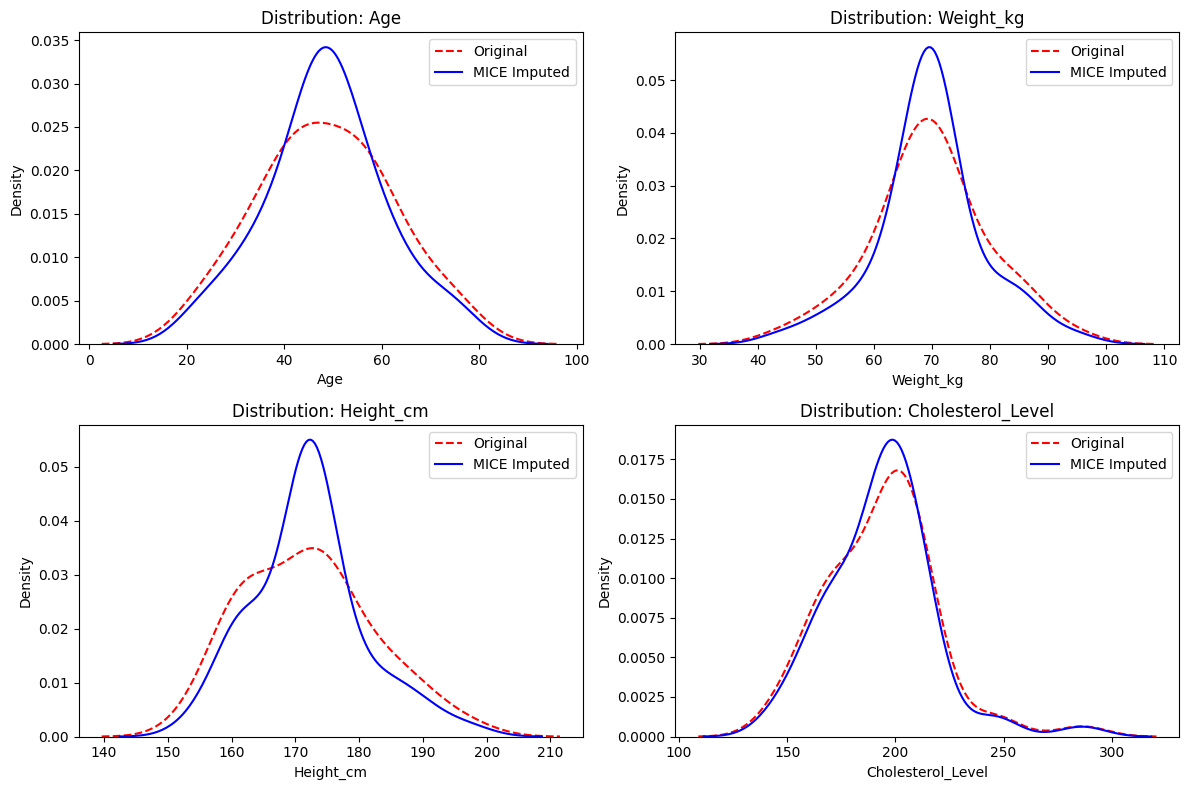

In [66]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Make a copy
df_mice = df.copy()

# Step 1: Initialize IterativeImputer
mice_imputer = IterativeImputer(random_state=42, max_iter=10)

# Step 2: Fit and transform
df_mice_imputed = mice_imputer.fit_transform(df_mice)

# Step 3: Convert back to DataFrame
df_mice_imputed = pd.DataFrame(df_mice_imputed, columns=df.columns)

# Show results
print("Dataset after Iterative Imputation (MICE):")
print(df_mice_imputed.head(10))


# Plot distribution before and after imputation
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = ['Age', 'Weight_kg', 'Height_cm', 'Cholesterol_Level']

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    sns.kdeplot(df[feature], label='Original', ax=ax, color='red', linestyle='--')
    sns.kdeplot(df_mice_imputed[feature], label='MICE Imputed', ax=ax, color='blue')
    ax.set_title(f"Distribution: {feature}")
    ax.legend()

plt.tight_layout()
plt.show()


#### obervation
- Almost same performance as KNN(in this example)
- It preserved the original distribution better than mean/median.
- It builds a regression model for each feature with missing values
- Works especially well in **multivariate data** (like medical records).

## 7)(TODO: Did not work as desired.  OPTIONAL: Complicated process) Using Machine Learning Models to Predict Missing Values
Method: Train a machine learning model (Random Forest, XGBoost) to predict missing values based on existing ones.

Pros:
- Highly accurate when patterns exist in the data.
- Works well for both numerical and categorical missing values.

Cons:
- Computationally expensive.
- Requires a significant amount of non-missing data for training.
- Can introduce bias if the model is not well-tuned.

**When to Use?**
- When a dataset is large enough to train a predictive model.
- When missing values depend on multiple variables.


In [67]:
df = pd.read_csv('missing_synthetic_health_data_500.csv')
print(df)

     Patient_ID  Age  Gender    BMI  Blood_Pressure  Cholesterol  Glucose  \
0             1   69  Female    NaN           126.0        209.7      NaN   
1             2   32  Female  20.94             NaN        195.6    110.1   
2             3   89    Male    NaN           112.8        186.0    121.2   
3             4   78    Male  27.24           143.6        152.2    155.2   
4             5   38    Male  22.70             NaN        215.4    107.8   
..          ...  ...     ...    ...             ...          ...      ...   
495         496   34  Female    NaN           143.1        237.2    112.1   
496         497   88  Female  30.07           112.7        206.3    141.1   
497         498   62  Female  21.89           103.2        185.3     77.4   
498         499   21    Male  25.71           122.1        224.2    109.5   
499         500   53  Female  18.66            93.5        170.8     81.5   

    Smoker Diabetic Heart_Disease  
0      Yes       No           Yes  
1  

In [68]:
#check for missing values
print(df.isnull().sum())

Patient_ID         0
Age                0
Gender             0
BMI               86
Blood_Pressure    69
Cholesterol       71
Glucose           78
Smoker             0
Diabetic           0
Heart_Disease      0
dtype: int64


0


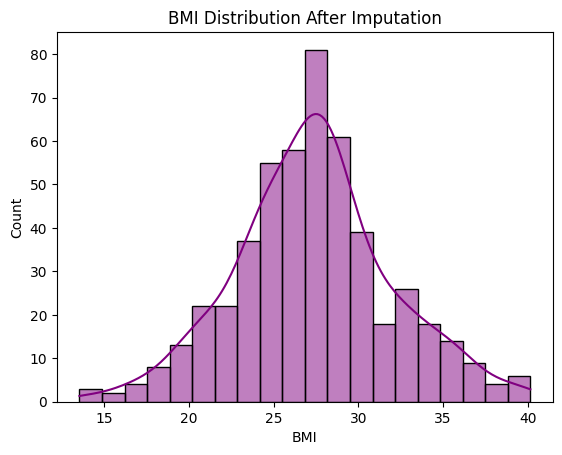

In [69]:
# Lets compute BMI first

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Drop Patient_ID (not useful for prediction)
df_model = df.drop(columns=['Patient_ID'])

# Step 2: Split the data into two sets — one with BMI, one without
df_bmi_known = df_model[df_model['BMI'].notnull()]
df_bmi_missing = df_model[df_model['BMI'].isnull()]

# Step 3: Define features and target
X = df_bmi_known.drop(columns=['BMI'])
y = df_bmi_known['BMI']

# Step 4: Preprocessing — encode categorical variables
categorical_cols = ['Gender', 'Smoker', 'Diabetic', 'Heart_Disease']
numerical_cols = ['Age', 'Blood_Pressure', 'Cholesterol', 'Glucose']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

# Step 5: Create pipeline with RandomForestRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Step 6: Fit the model
pipeline.fit(X, y)

# Step 7: Predict missing BMI values
X_missing = df_bmi_missing.drop(columns=['BMI'])
bmi_predicted = pipeline.predict(X_missing)

# Step 8: Fill missing BMI values in the original DataFrame
df.loc[df['BMI'].isnull(), 'BMI'] = bmi_predicted

# Step 9: Verify no more missing BMI values
print(df['BMI'].isnull().sum())  # Should print 0


sns.histplot(df['BMI'], kde=True, color='purple', bins=20)
plt.title("BMI Distribution After Imputation")
plt.xlabel("BMI")
plt.show()


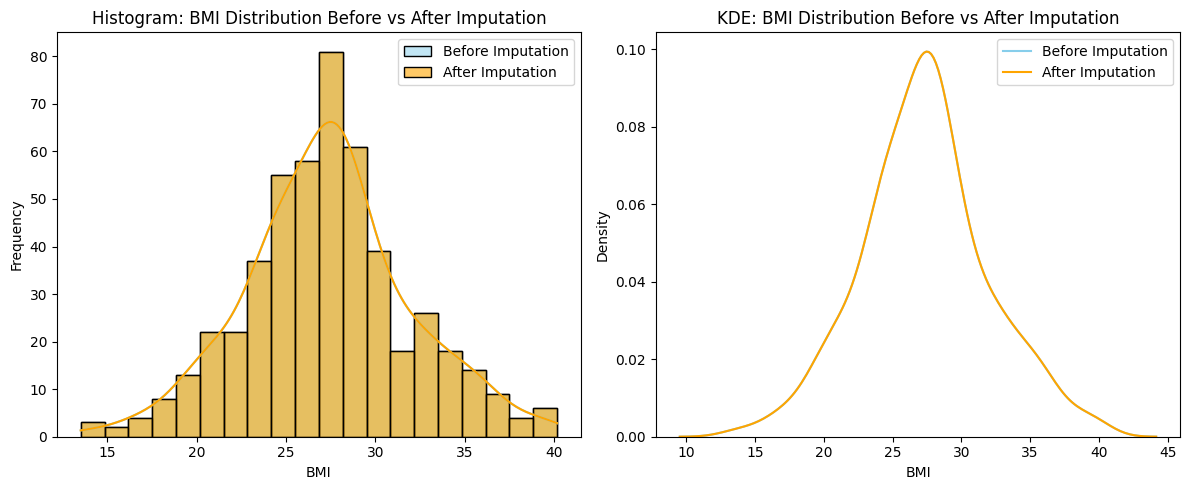

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reload the original data to get BMI with missing values
# (Assuming you've saved the original DataFrame before imputation)
# Otherwise, simulate it again for teaching purpose
df_original = df.copy()
df_original['BMI'] = np.where(df_original.index.isin(df[df['BMI'].isnull()].index), np.nan, df_original['BMI'])

# Step 2: Create two Series for comparison
bmi_before = df_original['BMI'].dropna()   # Only non-missing values
bmi_after = df['BMI']                      # All values (after filling)

# Step 3: Plot KDE or histograms
plt.figure(figsize=(12, 5))

# Histogram comparison
plt.subplot(1, 2, 1)
sns.histplot(bmi_before, kde=True, color='skyblue', label='Before Imputation', bins=20)
sns.histplot(bmi_after, kde=True, color='orange', label='After Imputation', bins=20, alpha=0.6)
plt.title('Histogram: BMI Distribution Before vs After Imputation')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()

# KDE comparison
plt.subplot(1, 2, 2)
sns.kdeplot(bmi_before, color='skyblue', label='Before Imputation')
sns.kdeplot(bmi_after, color='orange', label='After Imputation')
plt.title('KDE: BMI Distribution Before vs After Imputation')
plt.xlabel('BMI')
plt.legend()

plt.tight_layout()
plt.show()


## Duplicates
- Remove duplicates

In [71]:
# Sample data with duplicate rows
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Eve', 'Charlie'],
    'Age': [25, 30, 35, 25, 28, 35],
    'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Houston', 'Chicago']
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# Finding Duplicate Records
duplicates = df.duplicated()
print("\nDuplicate Records:\n", df[duplicates])

# Removing duplicates
df = df.drop_duplicates()
print("\nDataFrame after removing duplicates:\n", df)

Original DataFrame:
       Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    Alice   25     New York
4      Eve   28      Houston
5  Charlie   35      Chicago

Duplicate Records:
       Name  Age      City
3    Alice   25  New York
5  Charlie   35   Chicago

DataFrame after removing duplicates:
       Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
4      Eve   28      Houston
